1n1b1kr1/rB1b2qp/1p5n/2p1pp2/pPPP3p/B2P2P1/PN2QP1P/1R3RK1
1n1b1kr1/rB1b2qp/1p5n/2p1pp2/pPPP3p/B2P2P1/PN2QP1P/1R3RK1


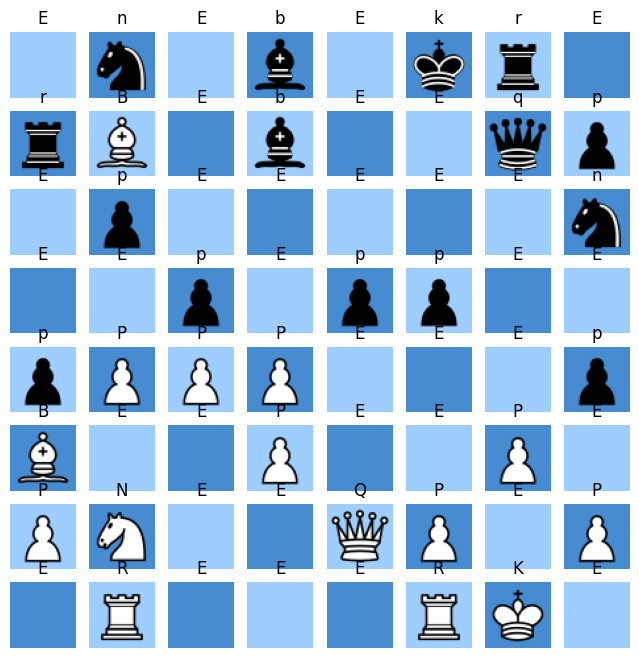

1r2k1n1/1b4br/p1n5/R1pPp1Bp/1pN4P/1P1P1Np1/4PPB1/1Q1K2R1
1r2k1n1/1b4br/p1n5/R1pPp1Bp/1pN4P/1P1P1Np1/4PPB1/1Q1K2R1


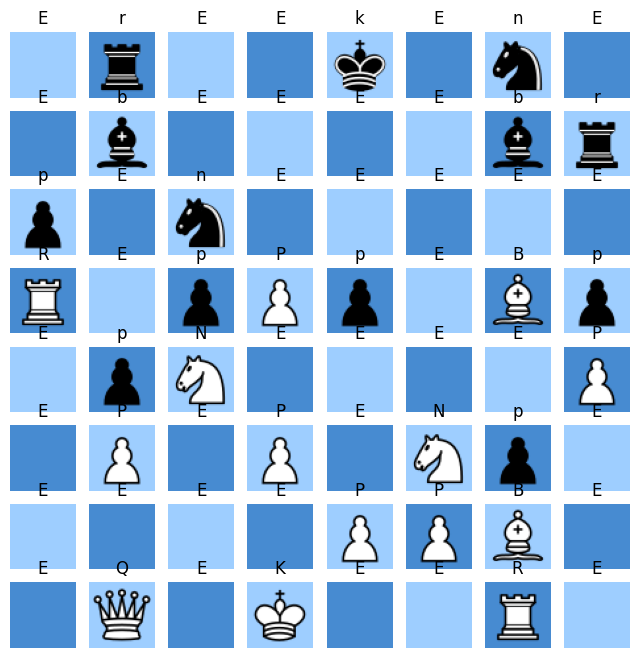

2b2k1r/5p1p/p1rpp3/np4pP/PP1PP2q/2N2BB1/2P2P2/R2K2N1
2b2k1r/5p1p/p1rpp3/np4pP/PP1PP2q/2N2BB1/2P2P2/R2K2N1


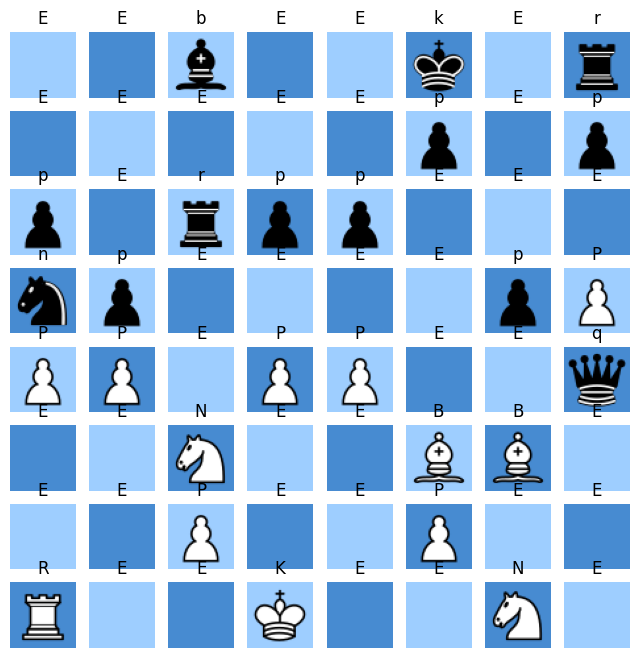

r1bq1b2/p2pp1p1/n1r2k1n/1pP2p1p/3PP2P/4QPPN/Pp4B1/R4K1R
r1bq1b2/p2pp1p1/n1r2k1n/1pP2p1p/3PP2P/4QPPN/Pp4B1/R4K1R


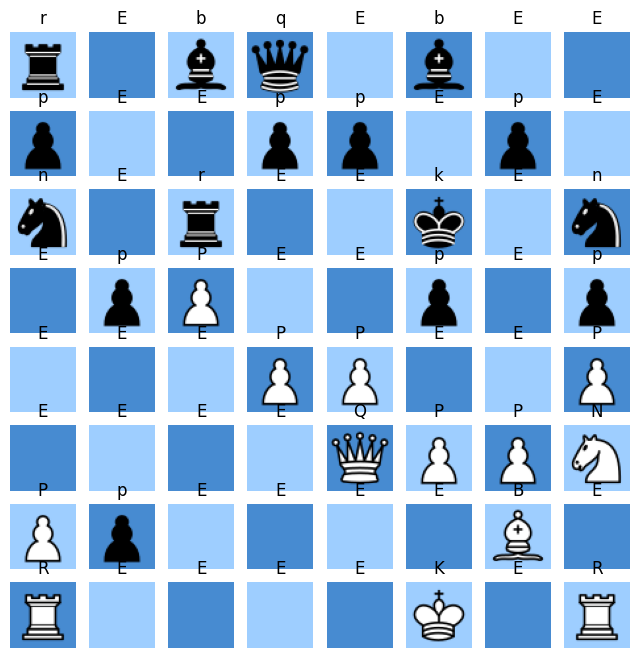

r2k2r1/1p2p2p/p1p1b1qb/P2N3P/1P1P1pP1/4B3/4P1P1/1R1nKB1R
r2k2r1/1p2p2p/p1p1b1qb/P2N3P/1P1P1pP1/4B3/4P1P1/1R1nKB1R


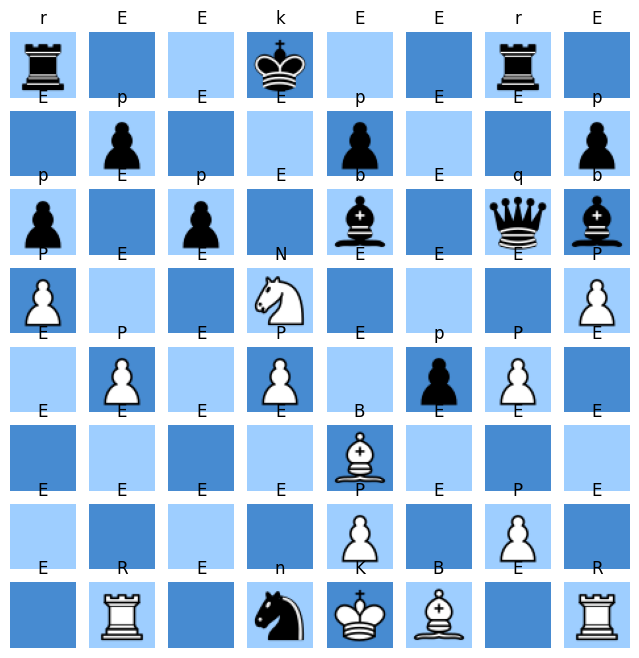

r3k1n1/pp3p1r/6pb/4pn1P/1P1p1PP1/P1Pb3N/1B1P2R1/R3KB2
r3k1n1/pp3p1r/6pb/4pn1P/1P1p1PP1/P1Pb3N/1B1P2R1/R3KB2


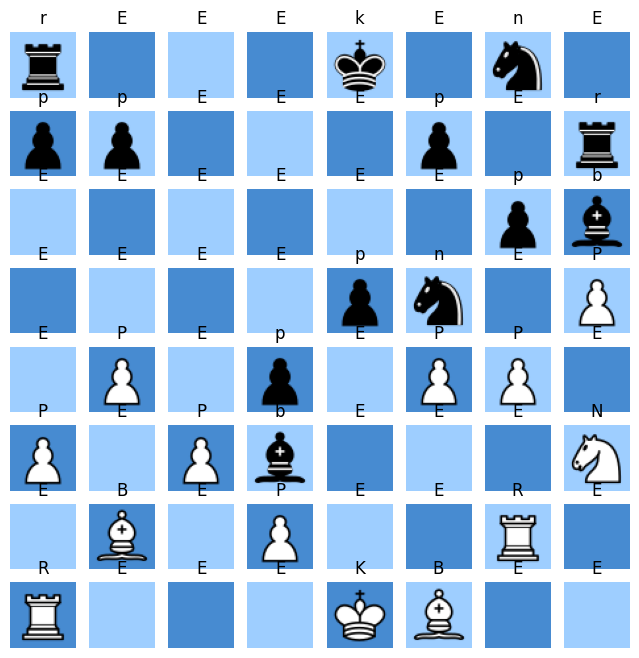

In [58]:
import glob
import os
import numpy as np
from PIL import Image
import chess
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import cv2

def detect_fen(images):
    label_list = ['E', 'N', 'p', 'B', 'b', 'Q', 'R', 'P', 'q', 'n', 'k', 'K', 'r']
    model = load_model('model.h5')

    # preprocess image
    np_images = np.array(images)

    # resize image
    np_images = np_images.reshape(-1, 50, 50, 3)

    # normalize image
    np_images = np_images / 255.0

    # predict
    pred = model.predict(np_images, verbose=None)
    pred = np.argmax(pred, axis=1)

    # show image 8 x 8
    fig = plt.figure(figsize=(8, 8))

    FEN = ""

    for i in range(8):
        E_count = 0
        for j in range(8):
            ax = fig.add_subplot(8, 8, 8*i+j+1)
            ax.imshow(images[8*i+j])
            ax.axis('off')
            ax.set_title(label_list[pred[8*i+j]])

            if label_list[pred[8*i+j]] == 'E':
                E_count += 1
            else:
                if E_count != 0:
                    FEN += str(E_count)
                    E_count = 0
                FEN += label_list[pred[8*i+j]]

        if E_count != 0:
            FEN += str(E_count)
            E_count = 0

        FEN += '/' if i != 7 else ''

    print(FEN)

    plt.show()

for file in glob.glob('data/*.png'):
    FEN = os.path.basename(file).replace('.png', '').replace('_', '/')
    print(FEN)
    board = chess.Board(FEN)

    detected_FEN = ""

    # read image
    image_list = []
    img = cv2.imread(file)

    # split image to 8x8
    for i in range(8):
        for j in range(8):
            x = 50 * j
            y = 50 * i
            image_list.append(img[y:y+50, x:x+50])

    # detect piece
    detect_fen(image_list)
